## Extra Trees Regressor

> Setting Random Forest ablaze with more randomness

**_Extra Trees (Extremely Randomized Trees)_** is an ensemble machine learning model that combines multiple decision trees, similar to Random Forest but with added randomization. It generates splits randomly without searching for optimal thresholds and typically uses the entire dataset for each tree, rather than bootstrap sampling. This extreme randomization approach makes the model faster to train while maintaining comparable performance to Random Forests.

For regression tasks, Extra Trees works as a *regressor* by averaging the predictions made by all the individual trees in the ensemble. In this setup, each tree generates a predicted value, and the final prediction is the average of these values. This ensemble approach helps reduce overfitting and improves generalization compared to individual decision trees. For classification tasks, it uses majority voting among trees to make predictions.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor  

# Create dataset
dataset_dict = {
   'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny',
               'rain', 'sunny', 'overcast', 'overcast', 'rain', 'sunny', 'overcast', 'rain', 'sunny',
               'sunny', 'rain', 'overcast', 'rain', 'sunny', 'overcast', 'sunny', 'overcast', 'rain', 'overcast'],
   'Temp.': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0,
             81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
   'Humid.': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0,
              88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
   'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True,
            True, False, False, True, False, True, True, False, True, False, False, True, False, False],
   'Num_Players': [52, 39, 43, 37, 28, 19, 43, 47, 56, 33, 49, 23, 42, 13, 33, 29, 25, 51, 41, 14,
                  34, 29, 49, 36, 57, 21, 23, 41]
}

# Prepare data
df = pd.DataFrame(dataset_dict)
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='')
df['Wind'] = df['Wind'].astype(int)

# Split features and target
X, y = df.drop('Num_Players', axis=1), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Train Extra Trees
et = ExtraTreesRegressor(
   n_estimators=100,
   max_features='sqrt',
   bootstrap=False,  # Extra Trees typically doesn't use bootstrap
   random_state=42
)
et.fit(X_train, y_train)

# Predict and evaluate
y_pred = et.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 5.61


Prediction Comparison:
    Actual  Predicted
14      33      40.71
15      29      34.99
16      25      33.84
17      51      46.16
18      41      47.61
19      14      19.23
20      34      33.74
21      29      33.93
22      49      46.77
23      36      41.32
24      57      51.20
25      21      29.04
26      23      26.05
27      41      43.72

Model Accuracy: 77.56%


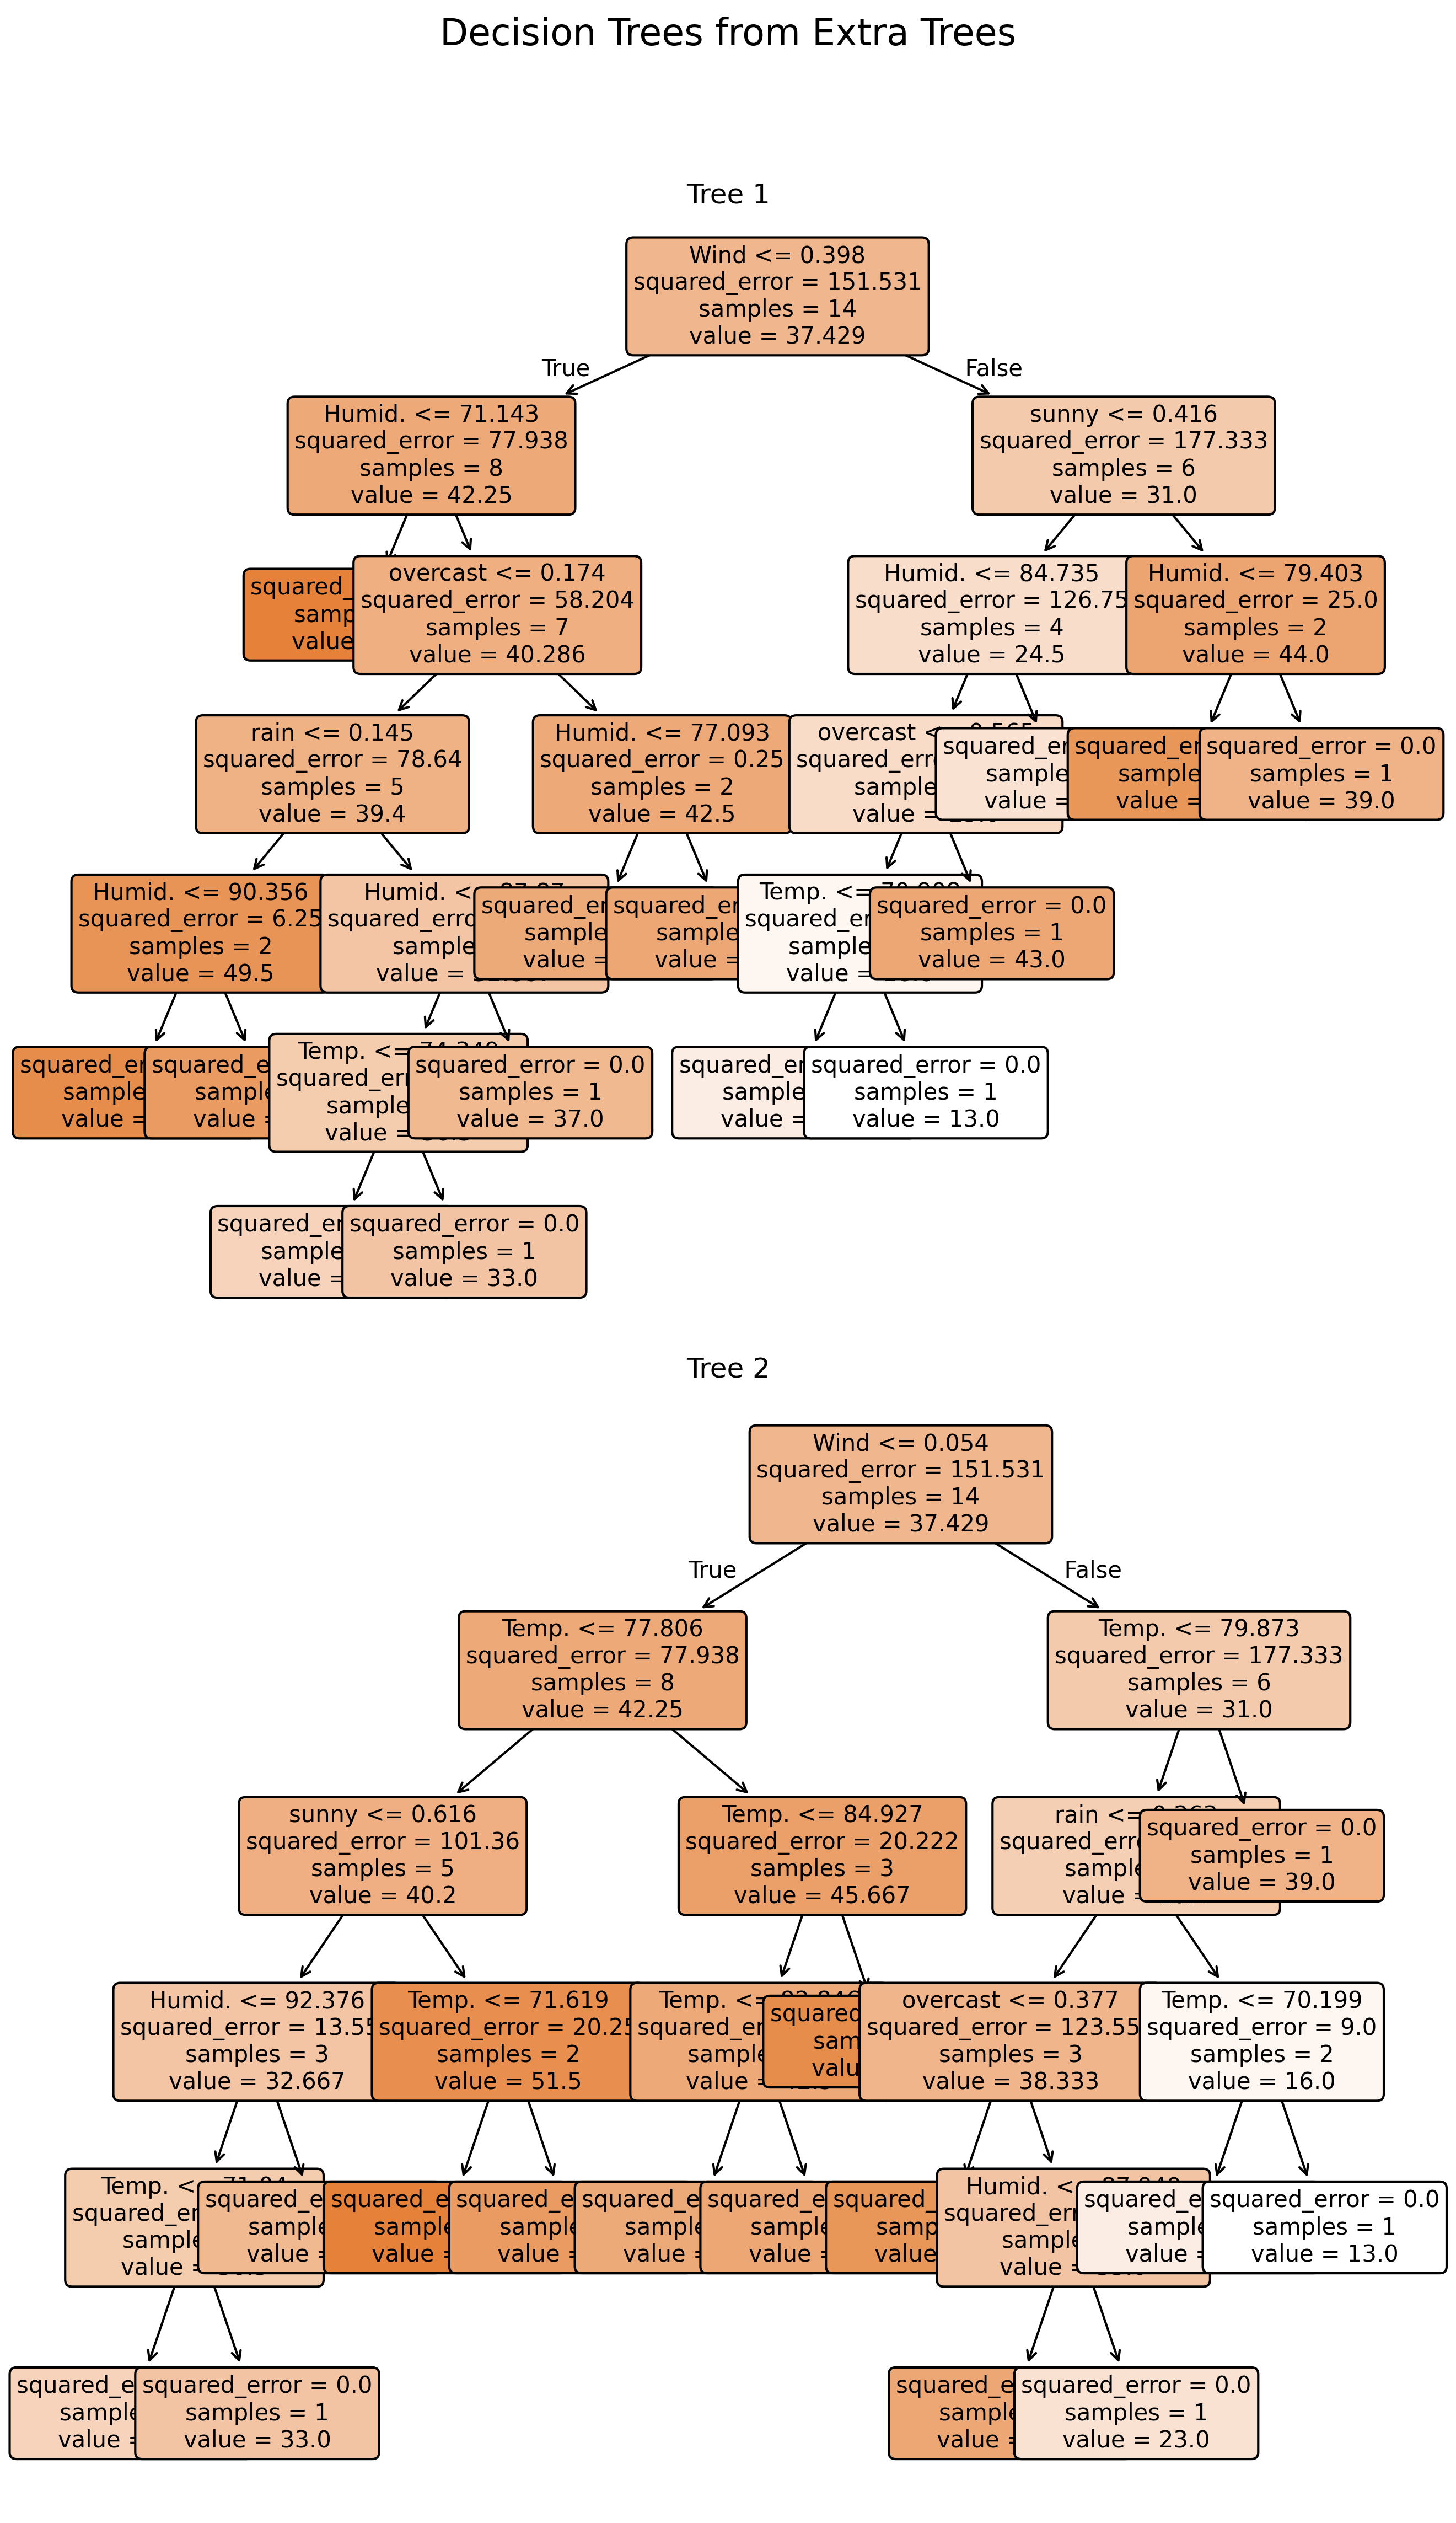

In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': et.predict(X_test)
})

# Print comparison
print("Prediction Comparison:")
print(comparison_df)

# Calculate and print accuracy
accuracy = et.score(X_test, y_test)
print(f"\nModel Accuracy: {accuracy:.2%}")

# Create visualizations for trees 1 and 2
trees_to_show = [0, 1]  # Python uses 0-based indexing
feature_names = X_train.columns.tolist()
class_names = ['No', 'Yes']

# Set up the plot
fig, axes = plt.subplots(2, 1, figsize=(9, 16), dpi=300)  # Reduced height, increased DPI
fig.suptitle('Decision Trees from Extra Trees', fontsize=16)

# Plot each tree
for idx, tree_idx in enumerate(trees_to_show):
    plot_tree(et.estimators_[tree_idx],
              feature_names=feature_names,
              class_names=class_names,
              filled=True,
              rounded=True,
              ax=axes[idx],
              fontsize=10) 
    axes[idx].set_title(f'Tree {tree_idx + 1}', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])